In [1]:
import numpy as np
yield_data = np.genfromtxt ('../gbp_noheader.in', delimiter="\t", dtype=None, encoding="utf8")

In [183]:
tr = yield_data[:3990]
tr.shape

cu = tr.reshape(int(4000/14), 1, 14, 7) # second dimension is because it expects things like RGB (3)
#int(4000/14)*14
cu.shape

#print(tr[:14,:])

print(cu[0])

train_x = cu[:,:,:-1,:]
train_y = cu[:,:,-1:,:].reshape(285,7)

val = yield_data[-658:].reshape(int(659/14), 1, 14, 7)
val_x = val[:,:,:-1,:]
val_y = val[:,:,-1:,:].reshape(47,7)

#print(train_y[0])

[[[0.0581094 0.0583031 0.0591828 0.0591156 0.0590531 0.0584922 0.0579141]
  [0.060975  0.06      0.0593813 0.05915   0.0590328 0.05835   0.057625 ]
  [0.0557125 0.0579375 0.0589375 0.05875   0.0584922 0.0575125 0.0567969]
  [0.0537813 0.0570625 0.0586859 0.0584969 0.0582156 0.0572305 0.0563438]
  [0.055     0.0572875 0.0585672 0.0582813 0.0580016 0.0569469 0.0562063]
  [0.0534344 0.0575    0.058625  0.05835   0.0580531 0.0569594 0.0562063]
  [0.055     0.0584172 0.0588063 0.0584922 0.0582406 0.0572625 0.0564703]
  [0.06      0.059825  0.0589375 0.058575  0.058275  0.0573125 0.0565453]
  [0.0612188 0.0606688 0.05995   0.0592625 0.0588375 0.057725  0.0568563]
  [0.06      0.059875  0.059925  0.059225  0.0587563 0.057675  0.0568313]
  [0.0609844 0.0606063 0.06      0.0592375 0.0587438 0.0576    0.0566719]
  [0.0587625 0.0593469 0.0595984 0.0592125 0.0587188 0.0577016 0.0568219]
  [0.0628    0.06      0.0595    0.0590703 0.0586172 0.057575  0.0566578]
  [0.0667313 0.0622219 0.0597359 0.059

In [65]:
tr = yield_data[:4000]
train_x = tr[::2]
train_y = tr[1::2]
val = yield_data[4000:-1]
val_x = val[::2]
val_y = val[1::2]

In [109]:
import torch

dtype = torch.float
device = torch.device("cpu")

In [67]:
N, D_in, H, D_out = 2000, 7, 14, 7

In [184]:
x = torch.from_numpy(train_x).float()
y = torch.from_numpy(train_y).float()

xval = torch.from_numpy(val_x).float()
yval = torch.from_numpy(val_y).float()

In [185]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, out_channels=2, kernel_size=2, stride=1)
        self.fc1 = nn.Linear(2*6*12, 7)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.sigmoid(x)
        x = x.view(-1, 2*6*12)
        x = self.fc1(x)
        x = torch.sigmoid(x)
        return x



model_conv = ConvNet()

learning_rate = 1e-2
optimizer = torch.optim.SGD(model_conv.parameters(), lr=learning_rate, momentum=0.9)
lossMSE = torch.nn.MSELoss()

print(model_conv)

ConvNet(
  (conv1): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=144, out_features=7, bias=True)
)


In [69]:
modelf = torch.nn.Sequential(
    torch.nn.Linear(7, 20),
    torch.nn.Sigmoid(),
    torch.nn.Linear(20, 7),
    torch.nn.Sigmoid()
)
#print(modelf)
learning_rate = 1e-2
optimizer = torch.optim.SGD(modelf.parameters(), lr=learning_rate, momentum=0.9)
lossMSE = torch.nn.MSELoss()

In [176]:
train_res = []
for t in range(500):
    optimizer.zero_grad()
    net_out = model_conv(x)
    loss = lossMSE(net_out, y)
    loss.backward()
    optimizer.step()
    
    #print(t, loss.data[0].item())
    
    val_pred = modelf(xval)
    val_loss = lossMSE(val_pred, yval)
    
    train_res.append([t,loss.item(), val_loss.item()])



/Users/dyashkir/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


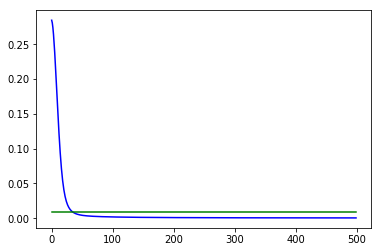

In [177]:

import matplotlib.pyplot as plt
xs = [x[0] for x in train_res]
ys = [x[1] for x in train_res]
val = [x[2] for x in train_res]
plt.figure()

plt.plot(xs, ys, color = 'blue')
plt.plot(xs, val, color = 'green')
plt.show()

In [9]:
#class way to define a model

import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 20)
        #self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 7)
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)
        #return x
net = Net()
print(net)
learning_rate = 1e-1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
lossMSE = torch.nn.MSELoss()

Net(
  (fc1): Linear(in_features=7, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=7, bias=True)
)
